In [41]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
import spacy
from collections import Counter
from nltk import pos_tag
from wordcloud import WordCloud




In [2]:
df = pd.read_csv("veri.csv") 
print(df.head(2))


   id                                                                                                                                                                             sentence
0   1  On January 3rd, 2023, Dr. Emily Watson, a senior data scientist at GreenAI Inc., gave a keynote speech at the International Conference on Artificial Intelligence in Paris, France.
1   2                                                  During her talk, she emphasized the importance of ethical AI and data privacy, citing recent cases of misuse in various industries.


In [3]:
#TOKENİZASYON ' KELİME BAZLI'
text = df["sentence"][0]

words = word_tokenize(text)
print("\n📌 Kelime Bazlı Tokenization:\n", words[:20])



📌 Kelime Bazlı Tokenization:
 ['On', 'January', '3rd', ',', '2023', ',', 'Dr.', 'Emily', 'Watson', ',', 'a', 'senior', 'data', 'scientist', 'at', 'GreenAI', 'Inc.', ',', 'gave', 'a']


In [4]:
#Tüm kelimeleri küçük harfe çevirmek = LOWERCASİNG
df["lowercase"] = df["sentence"].str.lower()

print(df[["id", "lowercase"]].head())

   id                                                                                                                                                                            lowercase
0   1  on january 3rd, 2023, dr. emily watson, a senior data scientist at greenai inc., gave a keynote speech at the international conference on artificial intelligence in paris, france.
1   2                                                  during her talk, she emphasized the importance of ethical ai and data privacy, citing recent cases of misuse in various industries.
2   3                                                 she mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million.
3   4                                furthermore, she highlighted the role of open-source libraries, such as spacy and nltk, in democratizing access to natural language processing tools.
4   5                                                          ac

In [5]:
from string import punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#  Removing Punctuation = noktalama işaretlerini kaldırma 

df["no_punct"] = df["lowercase"].str.replace(r'[^\w\s]', '', regex=True)

print(df[["id", "no_punct"]].head())


   id                                                                                                                                                                     no_punct
0   1  on january 3rd 2023 dr emily watson a senior data scientist at greenai inc gave a keynote speech at the international conference on artificial intelligence in paris france
1   2                                             during her talk she emphasized the importance of ethical ai and data privacy citing recent cases of misuse in various industries
2   3                                              she mentioned that over 32 million users were affected by a data breach last year resulting in damages estimated at 125 million
3   4                             furthermore she highlighted the role of opensource libraries such as spacy and nltk in democratizing access to natural language processing tools
4   5                                                     according to her students and researchers can n

In [21]:
# removing stopwords
nltk.download('stopwords')

sw = stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ceren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [22]:
df["no_stopwords"] = df["no_punct"].apply(
    lambda x: " ".join([word for word in x.split() if word not in sw])
)


In [23]:
print(df[["id", "no_stopwords"]].head())


   id                                                                                                                                          no_stopwords
0   1  january 3rd 2023 dr emily watson senior data scientist greenai inc gave keynote speech international conference artificial intelligence paris france
1   2                                                      talk emphasized importance ethical ai data privacy citing recent cases misuse various industries
2   3                                                     mentioned 32 million users affected data breach last year resulting damages estimated 125 million
3   4                                   furthermore highlighted role opensource libraries spacy nltk democratizing access natural language processing tools
4   5                                                 according students researchers build highquality nlp models without needing large financial resources


In [24]:
# REMOVING NUMBERS 
df["no_numbers"] = df["no_stopwords"].apply(
    lambda x: re.sub(r'\d+', '', x)
)

print(df[["id", "no_numbers"]].head())


   id                                                                                                                                       no_numbers
0   1  january rd  dr emily watson senior data scientist greenai inc gave keynote speech international conference artificial intelligence paris france
1   2                                                 talk emphasized importance ethical ai data privacy citing recent cases misuse various industries
2   3                                                     mentioned  million users affected data breach last year resulting damages estimated  million
3   4                              furthermore highlighted role opensource libraries spacy nltk democratizing access natural language processing tools
4   5                                            according students researchers build highquality nlp models without needing large financial resources


In [25]:
#Steamming ,Lemmatizationun aksine kelimeleri köke ayırır ama kelimeleri kırparak anlamlı olmak zorunda değil.
stemmer = PorterStemmer()

df["stemmed"] = df["no_numbers"].apply(
    lambda x: " ".join([stemmer.stem(word) for word in x.split()])
)

print(df[["id", "stemmed"]].head())

   id                                                                                                                     stemmed
0   1  januari rd dr emili watson senior data scientist greenai inc gave keynot speech intern confer artifici intellig pari franc
1   2                                             talk emphas import ethic ai data privaci cite recent case misus variou industri
2   3                                                mention million user affect data breach last year result damag estim million
3   4                           furthermor highlight role opensourc librari spaci nltk democrat access natur languag process tool
4   5                                          accord student research build highqual nlp model without need larg financi resourc


In [26]:
# Named Entity Recognition (NER)

# SpaCy'nin İngilizce modelini yüklüyoruz
nlp = spacy.load("en_core_web_sm")


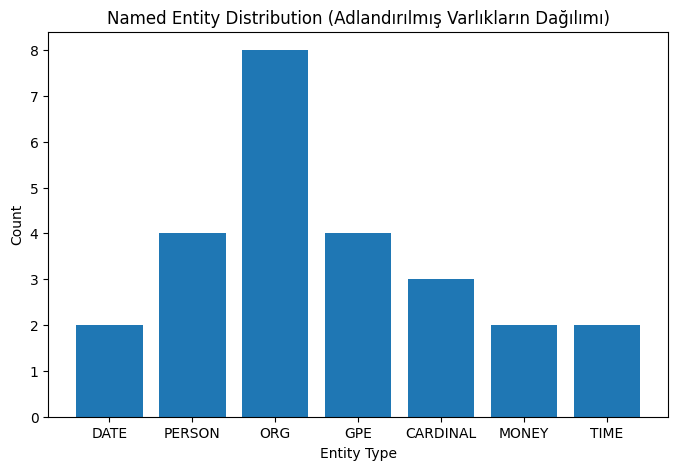

In [31]:
# Tüm entity’leri ( varlıkları ) topla
entities = []
for sentence in df["sentence"]:
    doc = nlp(sentence)
    for ent in doc.ents:
        entities.append(ent.label_)

# Entity türlerini say
entity_counts = Counter(entities)

# DataFrame’e dönüştür
entity_df = pd.DataFrame(entity_counts.items(), columns=["Entity", "Count"])

# Barplot çiz
plt.figure(figsize=(8,5))
plt.bar(entity_df["Entity"], entity_df["Count"])
plt.title("Named Entity Distribution (Adlandırılmış Varlıkların Dağılımı)")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()

In [51]:
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger") 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ceren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ceren\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
#POS TAGGING 
#POS Tagging (Part-of-Speech Tagging) =
#Her kelimenin dil bilgisi türünü (isim, fiil, sıfat, zarf, sayı, zamir vs.) belirleme işlemidir.


def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_, token.tag_) for token in doc]

 # Yeni sütun olarak ekleyelim
df["POS_Tags"] = df["sentence"].apply(pos_tagging)

# İlk birkaç satırı görelim
print(df[["id", "POS_Tags"]].head())

   id  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             POS_Tags  
0  [(On, ADP, IN), (January, PROPN, NNP), (3rd, NOUN, NN), (,, PUNCT, ,), (2023, NUM, CD), (,, PUNCT, ,), (Dr., PROPN, NNP), (Emily, PROPN, NNP), (Watson, PROPN, NNP), (,, PUNCT, ,), (a, DET, DT), (senior, ADJ, JJ), (data, NOUN, NN), (scientist, NOUN, NN), (at, ADP, IN), (GreenAI, PROPN, NNP), (I

[('a', 8), ('and', 6), ('the', 5), ('in', 5), ('her', 5), ('she', 5), ('at', 4), ('of', 4), ('on', 3), ('data', 3)]


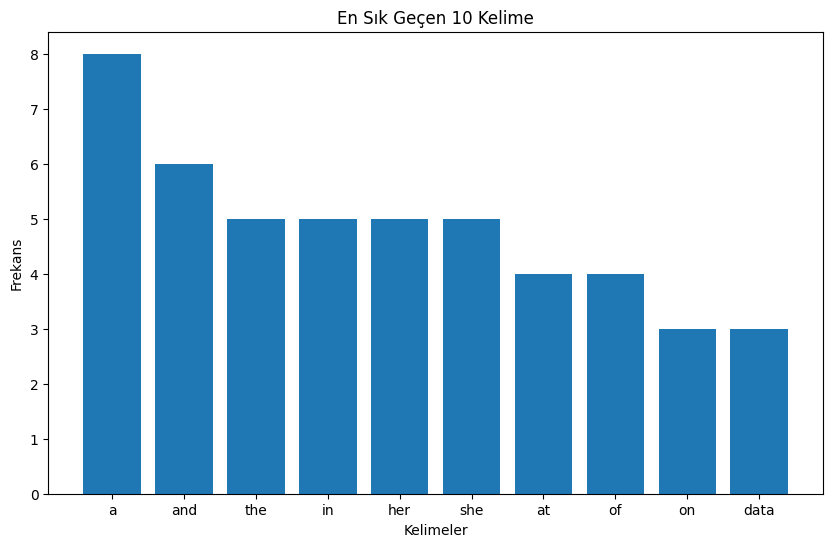

In [50]:
# WORD FREQUENCY COUNT ( EN SIK GEÇEN KELİMELERİ BULMA)

# Basit temizleme (noktalama kaldır, küçük harfe çevir)
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama temizle
    text = text.lower()  # Küçük harfe çevir
    return text


# Tüm cümleleri birleştir
all_text = " ".join(df["sentence"].apply(clean_text))
# Kelimelere ayır
tokens = all_text.split()

# Kelime sıklığını hesapla
word_freq = Counter(tokens)

# En sık geçen 10 kelime
print(word_freq.most_common(10))

common_words = word_freq.most_common(10)
words = [w for w, c in common_words]
counts = [c for w, c in common_words]

# Barplot çizelim
plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.title("En Sık Geçen 10 Kelime")
plt.xlabel("Kelimeler")
plt.ylabel("Frekans")
plt.show()

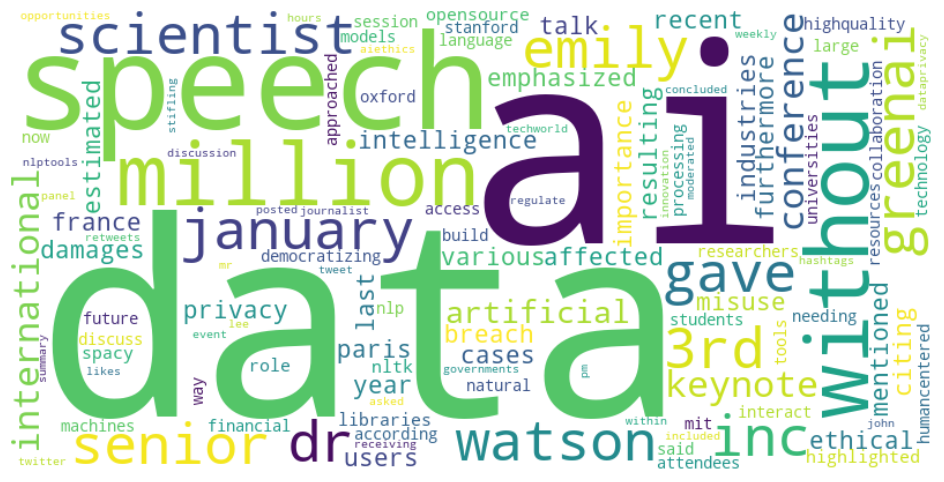

In [42]:
#TEXT VISULAZATION
all_text = " ".join(df["sentence"].apply(clean_text))

# WordCloud oluştur
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Görselleştir
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()